In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 변수 정의

num = 10
num_coeffs = 1
epochs = 1000
learning_rate = 0.2

In [3]:
# cost 저장

n10_test_cost = []
n20_test_cost = []
n100_test_cost = []

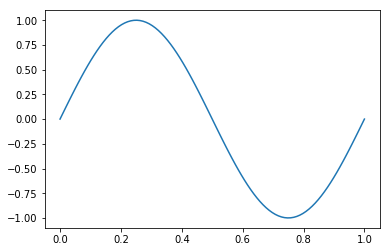

In [4]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.show()

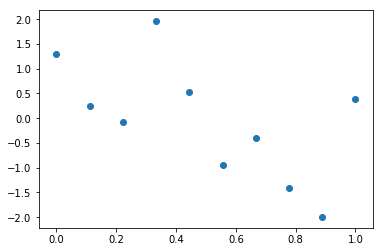

In [5]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

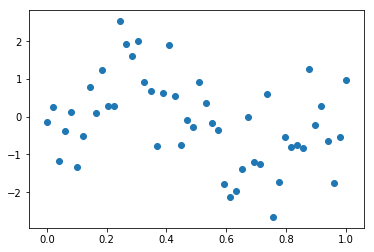

In [6]:
# 테스트 데이터 만들기
test_num = 50

test_x = np.linspace(0.0, 1.0, test_num)
#n = np.random.uniform(-0.5, 0.5, test_num)
n = np.random.normal(0.0, 1.0, test_num)
test_y = np.sin(2 * np.pi * test_x)
test_y += n

plt.scatter(test_x, test_y)
plt.show()

epoch : 0, cost : 14.6746
epoch : 100, cost : 11.6975
epoch : 200, cost : 11.6975
epoch : 300, cost : 11.6975
epoch : 400, cost : 11.6975
epoch : 500, cost : 11.6975
epoch : 600, cost : 11.6975
epoch : 700, cost : 11.6975
epoch : 800, cost : 11.6975
epoch : 900, cost : 11.6975


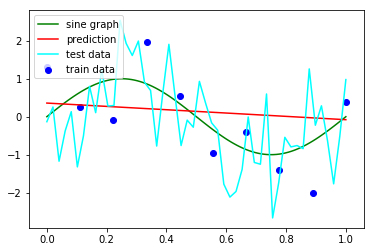

In [7]:
num = 10
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 22.479
epoch : 100, cost : 12.8563
epoch : 200, cost : 13.1349
epoch : 300, cost : 13.2728
epoch : 400, cost : 13.3028
epoch : 500, cost : 13.3088
epoch : 600, cost : 13.31
epoch : 700, cost : 13.3102
epoch : 800, cost : 13.3102
epoch : 900, cost : 13.3102


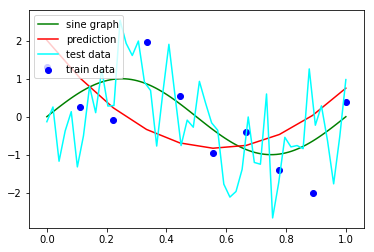

In [8]:
num = 10
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 31.6334
epoch : 100, cost : 14.6124
epoch : 200, cost : 13.6943
epoch : 300, cost : 12.8224
epoch : 400, cost : 12.0865
epoch : 500, cost : 11.4681
epoch : 600, cost : 10.9494
epoch : 700, cost : 10.5154
epoch : 800, cost : 10.1533
epoch : 900, cost : 9.85188


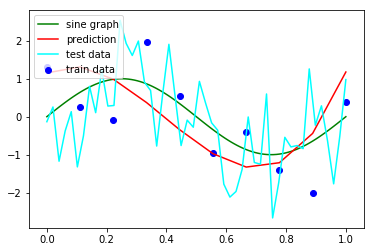

In [9]:
num = 10
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 300.151
epoch : 100, cost : 5.24769
epoch : 200, cost : 4.85686
epoch : 300, cost : 4.67987
epoch : 400, cost : 4.54147
epoch : 500, cost : 4.43259
epoch : 600, cost : 4.34683
epoch : 700, cost : 4.27921
epoch : 800, cost : 4.22578
epoch : 900, cost : 4.1835


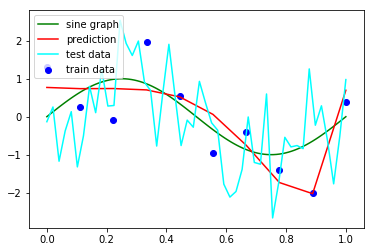

In [10]:
num = 10
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
       
    # test 데이터
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

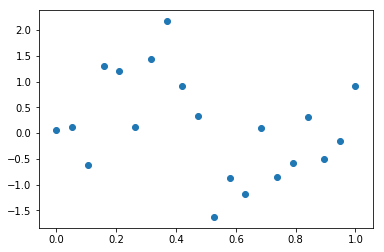

In [11]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 20

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

epoch : 0, cost : 22.5958
epoch : 100, cost : 22.4452
epoch : 200, cost : 22.4452
epoch : 300, cost : 22.4452
epoch : 400, cost : 22.4452
epoch : 500, cost : 22.4452
epoch : 600, cost : 22.4452
epoch : 700, cost : 22.4452
epoch : 800, cost : 22.4452
epoch : 900, cost : 22.4452


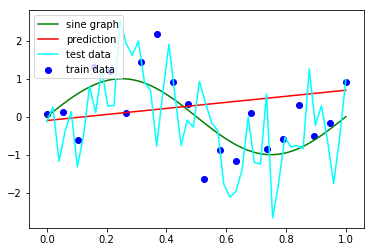

In [12]:
num = 20
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 27.4191
epoch : 100, cost : 21.2459
epoch : 200, cost : 21.547
epoch : 300, cost : 21.6252
epoch : 400, cost : 21.639
epoch : 500, cost : 21.6414
epoch : 600, cost : 21.6418
epoch : 700, cost : 21.6418
epoch : 800, cost : 21.6418
epoch : 900, cost : 21.6418


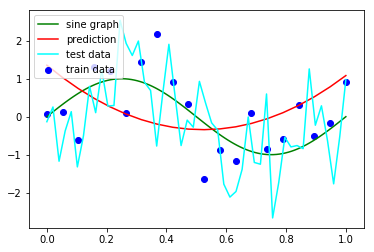

In [13]:
num = 20
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 33.7536
epoch : 100, cost : 19.5
epoch : 200, cost : 18.1119
epoch : 300, cost : 16.8739
epoch : 400, cost : 15.8287
epoch : 500, cost : 14.9474
epoch : 600, cost : 14.2046
epoch : 700, cost : 13.579
epoch : 800, cost : 13.0523
epoch : 900, cost : 12.6092


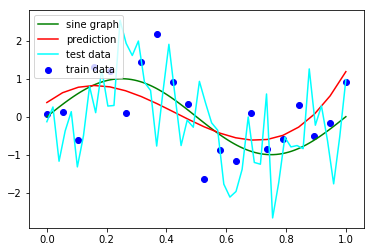

In [14]:
num = 20
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 95.3261
epoch : 100, cost : 39.5576
epoch : 200, cost : 36.2923
epoch : 300, cost : 32.5424
epoch : 400, cost : 29.4013
epoch : 500, cost : 26.959
epoch : 600, cost : 25.0914
epoch : 700, cost : 23.6727
epoch : 800, cost : 22.6003
epoch : 900, cost : 21.7943


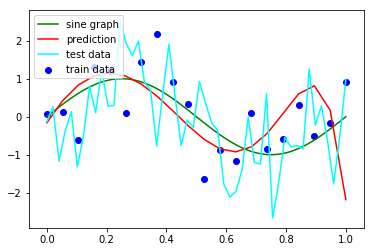

In [15]:
num = 20
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

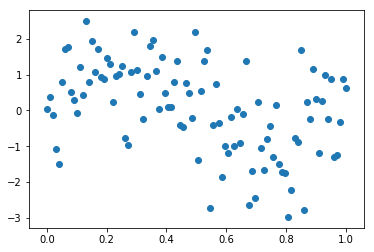

In [16]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 100

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

epoch : 0, cost : 181.395
epoch : 100, cost : 184.081
epoch : 200, cost : 184.081
epoch : 300, cost : 184.081
epoch : 400, cost : 184.081
epoch : 500, cost : 184.081
epoch : 600, cost : 184.081
epoch : 700, cost : 184.081
epoch : 800, cost : 184.081
epoch : 900, cost : 184.081


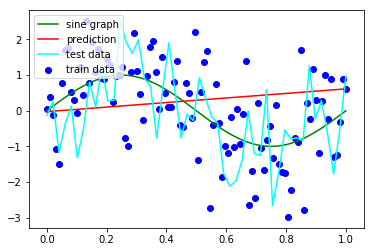

In [17]:
num = 100
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()

epoch : 0, cost : 208.977
epoch : 100, cost : 146.72
epoch : 200, cost : 148.139
epoch : 300, cost : 148.472
epoch : 400, cost : 148.521
epoch : 500, cost : 148.528
epoch : 600, cost : 148.528
epoch : 700, cost : 148.528
epoch : 800, cost : 148.528
epoch : 900, cost : 148.528


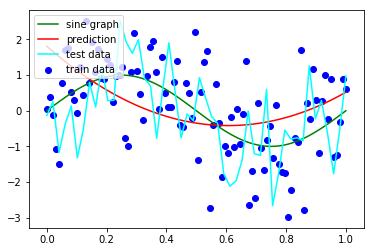

In [18]:
num = 100
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()  

epoch : 0, cost : 178.762
epoch : 100, cost : 129.985
epoch : 200, cost : 125.967
epoch : 300, cost : 122.392
epoch : 400, cost : 119.39
epoch : 500, cost : 116.869
epoch : 600, cost : 114.751
epoch : 700, cost : 112.968
epoch : 800, cost : 111.467
epoch : 900, cost : 110.202


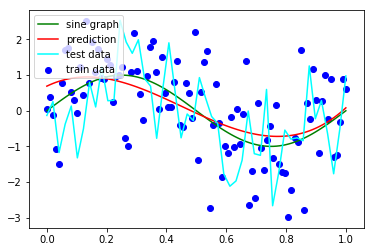

In [19]:
num = 100
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()      

epoch : 0, cost : 1.00463e+07
epoch : 100, cost : 2.5713e+06
epoch : 200, cost : 2.57949e+06
epoch : 300, cost : 2.41569e+06
epoch : 400, cost : 2.25514e+06
epoch : 500, cost : 2.1346e+06
epoch : 600, cost : 2.05137e+06
epoch : 700, cost : 1.99485e+06
epoch : 800, cost : 1.95952e+06
epoch : 900, cost : 1.93888e+06


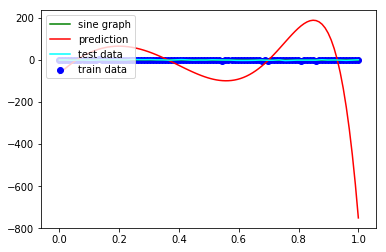

In [20]:
num = 100
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()      

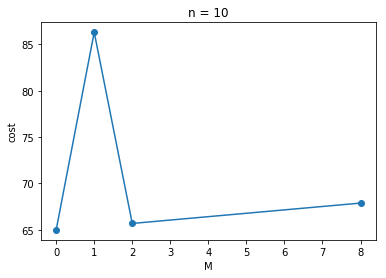

In [21]:
# n이 10일때 test cost 그래프

x = [0, 1, 2, 8]

plt.plot(x, n10_test_cost, 'o-')
plt.title('n = 10')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()

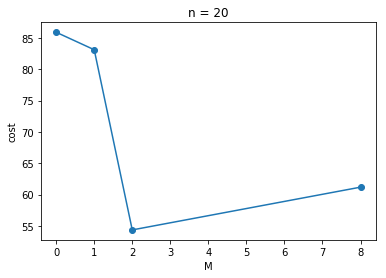

In [22]:
# n = 20일때 test cost 그래프

x = [0, 1, 2, 8]

plt.plot(x, n20_test_cost, 'o-')
plt.title('n = 20')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()

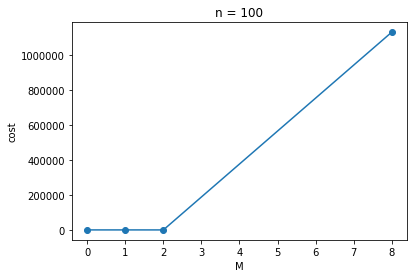

In [23]:
# n = 100일때 test cost 그래프

x = [0, 1, 2, 8]

plt.plot(x, n100_test_cost, 'o-')
plt.title('n = 100')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()